## Methods start here

In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('./trans_processed_PPMI_data.csv')
data.rename(columns={'Unnamed: 0':'Sentrix_position'}, inplace=True)
data.set_index('Sentrix_position', inplace=True)
ppmi = data.transpose()
ppmi

Sentrix_position,cg02168685,cg08732684,cg10284115,cg16348003,cg01990013,cg18978661,cg16622353,cg11642412,cg16654771,cg00013952,...,cg24173064,cg19473428,cg02182587,cg11188916,cg01861377,cg11779501,cg05170070,cg17737728,cg21770145,Category
200973410159_R03C01,0.181336,0.820307,0.869102,0.790106,0.859454,0.895517,0.811537,0.154034,0.0911408,0.320366,...,0.890418147061535,0.927857306429379,0.799382530396531,0.8054428195633879,0.622875319015292,0.9463008066586199,0.67113798026978,0.894916850078534,0.9039691384070251,HC
200991620021_R01C01,0.202823,0.749174,0.831778,0.599227,0.855764,0.850379,0.764679,0.164602,0.0580419,0.358467,...,0.898376562421111,0.8894105755342739,0.8322661913188779,0.713991620988404,0.530804598098317,0.9235490317097059,0.539385993509384,0.819174708964708,0.8531702856165259,PD
200991620021_R03C01,0.224653,0.792392,0.831574,0.753949,0.87098,0.889025,0.757706,0.15644,0.0504965,0.558762,...,0.889234597132543,0.921692457445995,0.8331455912971759,0.800237882151418,0.596883866310545,0.9374831275089909,0.634421960371285,0.8503420988564059,0.8405773134158481,PD
200989060105_R03C01,0.160047,0.811205,0.843772,0.716708,0.871558,0.879034,0.789269,0.165674,0.049425,0.697755,...,0.9086852961554159,0.9158887376822321,0.8418098065952501,0.821639815705984,0.573337419541095,0.945671469091769,0.65676323535506,0.857961378724338,0.8999614071096271,PD
200989060135_R07C01,0.09507,0.802935,0.834807,0.759217,0.848119,0.845383,0.775941,0.141665,0.0410359,0.629899,...,0.912689347675698,0.901105957264047,0.798531861700428,0.785818457964235,0.509175428667898,0.9329635476324729,0.555333835173846,0.87865924322434,0.885286690861348,HC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201004820064_R01C01,0.13364,0.821213,0.831841,0.702199,0.798801,0.862532,0.785111,0.117337,0.039129,0.516423,...,0.869777618897483,0.905131451379706,0.75374593228348,0.806931003629483,0.552576894305493,0.907845551566953,0.513710953049017,0.8875078009333021,0.8578574388767479,PD
200989060016_R02C01,0.196398,0.802054,0.865808,0.761991,0.867949,0.887828,0.760461,0.141577,0.0942219,0.530083,...,0.8830415388568051,0.917591231538894,0.8078008551096021,0.81308637324354,0.54947666876961,0.9354259367504251,0.5810136662540961,0.8474288061234779,0.885044743634488,PD
200989060155_R01C01,0.174273,0.775967,0.841902,0.742324,0.792145,0.910331,0.760855,0.103648,0.0523039,0.423577,...,0.887695889091264,0.905097911750989,0.7652219114997231,0.8072354687220641,0.36754784639567606,0.924622252445247,0.5915836883162479,0.913629224524567,0.847961129441462,PD
200989060155_R03C01,0.157101,0.830057,0.875768,0.661756,0.852537,0.858942,0.78817,0.134405,0.0937395,0.686011,...,0.89188529347046,0.9312940804158679,0.81273063414956,0.81252194025675,0.578182466908505,0.945585049861096,0.648620356086312,0.886854759912664,0.901903065262923,PD


In [4]:
ppmi.groupby('Category').count()

Sentrix_position,cg02168685,cg08732684,cg10284115,cg16348003,cg01990013,cg18978661,cg16622353,cg11642412,cg16654771,cg00013952,...,cg09004648,cg24173064,cg19473428,cg02182587,cg11188916,cg01861377,cg11779501,cg05170070,cg17737728,cg21770145
Category,,,,,,,,,,,,,,,,,,,,,
HC,127,127,127,127,127,127,127,127,127,127,...,127,127,127,127,127,127,127,127,127,127
PD,309,309,309,309,309,309,309,309,309,309,...,309,309,309,309,309,309,309,309,309,309


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
label = encoder.fit_transform(ppmi['Category'])
tr = ppmi.drop(['Category'], axis=1)
X = tr.values
y = label

#Stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
split.get_n_splits(X, y)

for train_index, test_index in split.split(X, y):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
### Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled
X_test_scaled = scaler.transform(X_test)

### Start Methods Here

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from umap.umap_ import UMAP
from sklearn.decomposition import FastICA
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score

import evalfw

### DR+LR: PPMI

/home/rz296/miniconda3/envs/partII/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Current model:  PCA and Logistic Regression
Confusion matrix of  PCA and Logistic Regression is:  [[ 1 25]
 [ 0 62]]
Accuracy of  PCA and Logistic Regression is:  0.7159090909090909
Precision of  PCA and Logistic Regression is:  0.7126436781609196
Recall of  PCA and Logistic Regression is:  1.0
F1 of  PCA and Logistic Regression is:  0.8322147651006712

Current model:  UMAP and Logistic Regression
Confusion matrix of  UMAP and Logistic Regression is:  [[ 1 25]
 [ 3 59]]
Accuracy of  UMAP and Logistic Regression is:  0.6818181818181818
Precision of  UMAP and Logistic Regression is:  0.7023809523809523
Recall of  UMAP and Logistic Regression is:  0.9516129032258065
F1 of  UMAP and Logistic Regression is:  0.8082191780821918

Current model:  ICA and Logistic Regression
Confusion matrix of  ICA and Logistic Regression is:  [[ 2 24]
 [ 2 60]]
Accuracy of  ICA and Logistic Regression is:  0.7045454545454546
Precision of  ICA and Logistic Regression is:  0.7142857142857143
Recall of  ICA and 

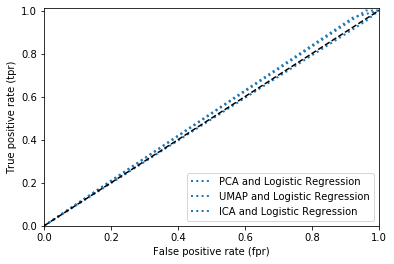

In [6]:
### PCA para: 50
pca_lr = Pipeline([
    ("pca", PCA(n_components=50)),
    ("lr", LogisticRegression(max_iter=500, penalty='none'))
])

### UMAP para: 50
umap_lr = Pipeline([
    ("umap", UMAP(n_components=50)),
    ("lr", LogisticRegression(max_iter=500, penalty='none'))
])

### ICA para:50
ica_lr = Pipeline([
    ("ica", FastICA(n_components=50)),
    ("lr", LogisticRegression(max_iter=500, penalty='none'))
])

pca_lr.fit(X_train_scaled, y_train)
umap_lr.fit(X_train_scaled, y_train)
ica_lr.fit(X_train_scaled, y_train)

clf_dict = {
    'PCA and Logistic Regression':pca_lr,
    'UMAP and Logistic Regression': umap_lr,
    'ICA and Logistic Regression': ica_lr
}

evalfw.eval(clf_dict, X_test_scaled, y_test)

# print("Accuracy of PCA + LR on PPMI testing set: ", accuracy_score(y_test, y_pred_pca_lr))
# print("Accuracy of UMAP + LR on PPMI testing set: ", accuracy_score(y_test, y_pred_umap_lr))
# print("Accuracy of ICA + LR on PPMI testing set: ", accuracy_score(y_test, y_pred_ica_lr))

### DR+SVM


In [ ]:
### PCA para: 200
pca_svm = Pipeline([
    ("pca", PCA(n_components=250)),
    ("lr", SVC(C=1000000, kernel='rbf'))
])

### UMAP para: 100
umap_svm = Pipeline([
    ("umap", UMAP(n_components=100)),
    ("lr", SVC(C=1000000, kernel='rbf'))
])

### ICA para:250
ica_svm = Pipeline([
    ("ica", FastICA(n_components=250)),
    ("lr", SVC(C=1000000, kernel='rbf'))
])

pca_svm.fit(X_train_scaled, y_train)
umap_svm.fit(X_train_scaled, y_train)
ica_svm.fit(X_train_scaled, y_train)

clf_dict = {
    'PCA and SVM':pca_svm,
    'UMAP and SVM': umap_svm,
    'ICA and SVM': ica_svm
}

evalfw.eval(clf_dict, X_test_scaled, y_test)

# print("Accuracy of PCA + SVM: ", accuracy_score(y_test, y_pred_pca_svm))
# print("Accuracy of UMAP + SVM: ", accuracy_score(y_test, y_pred_umap_svm))
# print("Accuracy of ICA + SVM: ", accuracy_score(y_test, y_pred_ica_svm))

### Regularisation+LR